_Exercice 1 :_
- 1. L'information est représentée sous forme de 1 ou de 0.
  2. 
  - La porte NOT inverse la valeur du bit
  - AND renvoie 1 si les deux bits sont à 1
  - OR renvoie 1 si au moins un des deux bits sont à 1
  - XOR renvoie 1 si exactement un des deux bits sont à 1
- 2. Les différents états quantique d'un Qubit sont : `|0⟩ et |1⟩`.
     L'équation décrit l'état quantique d'un qubit sous la forme d'une superposition des états de base |0⟩ et |1⟩. 𝛼 et 𝛽 déterminent les probabilités de mesurer le qubit dans chacun de ces états lorsque l'on effectue une mesure.

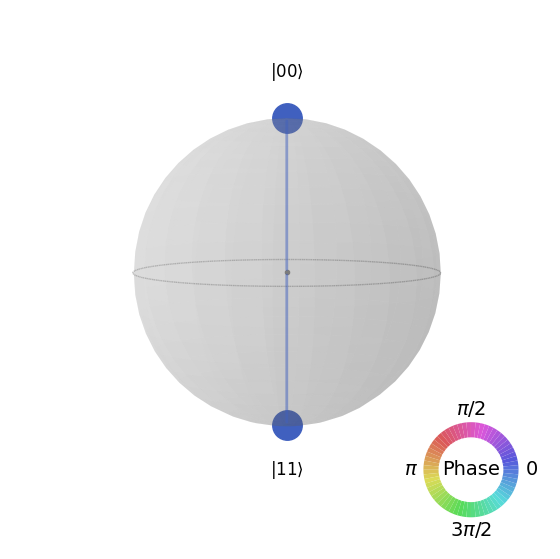

In [24]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw('mpl')

H: Hadamard gate (superposition)
X: Not gate (bit flip)
CNOT: Controlled Not gate (bit flip)
SWAP: Swap gate (bit swap)
CSWAP: Controlled Swap gate (bit swap)
TOF (CCNOT): Toffoli gate (bit flip)

Matrices:
H = `1/sqrt(2) * [[1, 1], [1, -1]]` de calcul matriciel : 
    
    ```
           (𝛼 + 𝛽)
    H|ψ⟩ = (𝛼 - 𝛽) * 1/sqrt(2)
    ```
```python
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.draw('mpl')
```
X = ``` [[0, 1], [1, 0]]``` de calcul matriciel :

    ```
        X|𝜓⟩ = 𝛽|0⟩ + 𝛼|1⟩
    ```
```python
    circ = QuantumCircuit(2)
    circ.cx(0)
    circ.draw('mpl')
```
CNOT = ```[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0 ,0, 0, 1]]``` (If the first is true, then the second is flipped)
En réalisant le calcul matriciel, on obtient le résultat suivant :
```
|𝜓⟩ = 𝛼00|00⟩ + 𝛼01|01⟩ + 𝛼11|10⟩ + 𝛼10|11⟩
```
```python
    circ = QuantumCircuit(3)
    circ.ccx(0,0,1)
    circ.draw('mpl')
```
SWAP = ```[[1, 0, 0, 0], [0, 0, 1, 0], [0 ,1, 0, 0], [0, 0, 0, 1]]``` (Swap the first and second)
En réalisant le calcul matriciel, on obtient le résultat suivant :
```
Swap|𝜓⟩ = 𝛼00|00⟩ + 𝛼10|01⟩ + 𝛼01|10⟩ + 𝛼11|11⟩
```
```python
    circ = QuantumCircuit(2)
    circ.swap(0,1)
    circ.draw('mpl')
```
CSWAP = ```[[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0 ,0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0 ,0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0 ,0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0 ,0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1]]``` (If the first is true, then the second and third are swapped) 
```python
    circ = QuantumCircuit(3)
    circ.cswap(0,1,2)
    circ.draw('mpl')
```
TOF = ```[[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0 ,0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0 ,0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0 ,0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0 ,0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0]]``` (If the first two are true, then the third is flipped)



Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


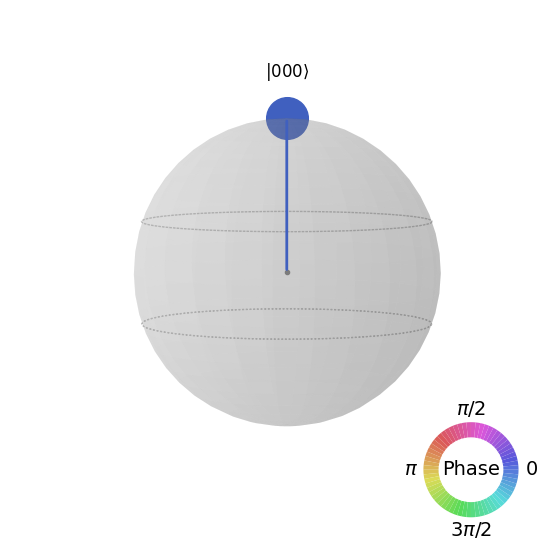

In [23]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_vector

def swap_three():
    circ = QuantumCircuit(2)
    circ.cx(1, 0)
    circ.cx(0, 1)
    circ.cx(1, 0)
    circ.draw('mpl')
    return circ

def swap():
    circ = QuantumCircuit(2)
    circ.swap(0, 1)
    circ.draw('mpl')
    return circ

def cswap():
    circ = QuantumCircuit(3)
    circ.cswap(0,1,2)
    circ.draw('mpl')
    return circ

def cswap_three():
    circ = QuantumCircuit(3)
    circ.cx(0, 1)
    circ.cx(0, 2)
    circ.cx(0, 1)
    circ.draw('mpl')
    return circ

swap = swap()
swap.draw('mpl')
swap_three = swap_three()
swap_three.draw('mpl')
cswap = cswap()
cswap.draw('mpl')
cswap_three = cswap_three()
cswap_three.draw('mpl')
state = Statevector(cswap)
plot_bloch_vector(state, title="New Bloch Sphere")
plot_state_qsphere(state)


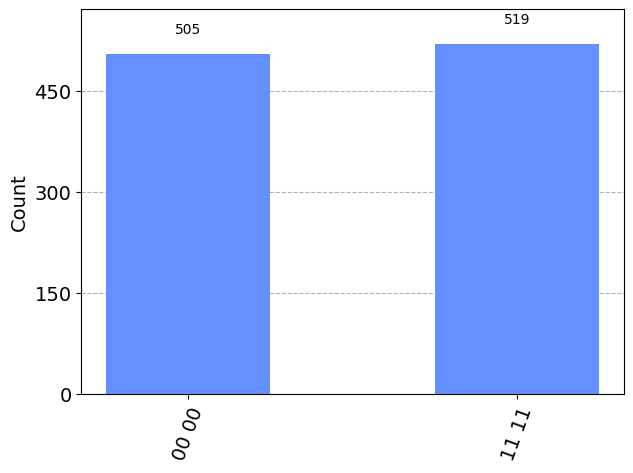

In [38]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()
circ.measure_all()

simulator = AerSimulator()
compiled_circ = transpile(circ, simulator)
job = simulator.run(compiled_circ, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

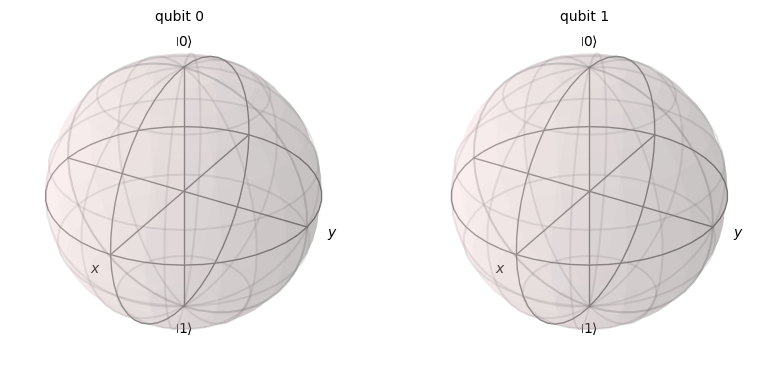

In [36]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer import AerSimulator

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
final_state = Statevector(circ)
plot_bloch_multivector(final_state)

_Exercice 4_:
On obtient le circuit suivant :
Au départ, nous avons un qubit |ψ⟩ sur le système d'Alice. Cet état peut être exprimé comme |ψ⟩ = α|0⟩ + β|1⟩, où α et β sont des coefficients complexes.

Ensuite, on créé une pair d'états de Bell:
Deux qubits auxiliaires sont préparés en état |00⟩.
Un porte Hadamard (H) est appliqué au premier qubit auxiliaire, créant ainsi une superposition de base de Bell.
Ensuite, une porte CNOT (CX) est utilisée pour créer une paire d'états intriqués (Bell pair) entre le premier et le deuxième qubit auxiliaire. Cela crée une corrélation entre les qubits auxiliaires.

Mesures de Alice et de l'auxiliaire :
Alice effectue des mesures sur son propre qubit (le qubit à transférer) et le premier qubit auxiliaire. Les résultats de ces mesures sont stockés dans un registre classique.

Correction de l'état de Bob :
En fonction des résultats des mesures effectuées par Alice et du premier qubit auxiliaire, des portes conditionnelles (X et Z) sont appliquées au qubit de Bob.
Si la mesure d'Alice est 1, une porte X est appliquée au qubit de Bob.
Si la mesure du premier qubit auxiliaire est 1, une porte Z est appliquée au qubit de Bob.
Ces portes conditionnelles permettent de corriger l'état de Bob en fonction des résultats des mesures d'Alice et de l'auxiliaire.

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer import AerSimulator

circuit = QuantumCircuit(2, 2)
circuit.h(0)


ModuleNotFoundError: No module named 'qiskit'